In [21]:
# plot min sup across time
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

def plot_dataset(df, title):
    """
    Plot the given dataframe using seaborn/matplotlib.

    Args:
    df (DataFrame): The dataframe to plot.
    title (str): The title of the plot.
    """
    sns.set(style="whitegrid")

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

    fig.tight_layout(pad=6.0)

    titles = [
        'Running Time Disk-Based vs Min-support Threshold',
        'Running Time Candidate Generation vs Min-support Threshold',
        'Number of Frequent Itemsets vs Min-support Threshold',
        'Largest Size of Frequent Itemsets vs Min-support Threshold'
    ]

    sns.lineplot(ax=axes[0, 0], data=df, x=df.index, y='Running Time Disk-Based (s)', marker='o')
    sns.lineplot(ax=axes[0, 1], data=df, x=df.index, y='Running Time Candidate Generation (s)', marker='o')
    sns.lineplot(ax=axes[1, 0], data=df, x=df.index, y='Number of Frequent Itemsets', marker='o')
    sns.lineplot(ax=axes[1, 1], data=df, x=df.index, y='Largest Size of Frequent Itemsets', marker='o')

    for ax, t in zip(axes.flatten(), titles):
        ax.set_title(t)
        ax.set_xlabel('Min-support Threshold')
        ax.set_ylabel('Value')

    plt.suptitle(title, fontsize=16)

    plt.show()

    
yelp_data = {
    'Min-support Threshold': [0.1, 0.08, 0.05, 0.03, 0.02, 0.01],
    'Running Time Disk-Based (s)': [382, 726, 1036, 1269, 4018, 16198],
    'Number of Frequent Itemsets': [3, 6, 17, 34, 71, 169],
    'Largest Size of Frequent Itemsets': [1, 2, 2, 2, 2, 3]
}
yelp_df = pd.DataFrame(yelp_data)
yelp_df.set_index('Min-support Threshold', inplace=True)

yelp_df

,Running Time Disk-Based (s),Number of Frequent Itemsets,Largest Size of Frequent Itemsets
Min-support Threshold,,,
0.10,382,3,1
0.08,726,6,2
0.05,1036,17,2
0.03,1269,34,2
0.02,4018,71,2
0.01,16198,169,3


In [49]:
    
fifa_data = {
    'Min-support Threshold': [0.2, 0.1, 0.05, 0.025,0.01],
    'Running Time Disk-Based (s)': [1.27, 2.04, 3.55, 6.66, 12.88],
    'Running Time Candidate Generation (s)': [0.627, 1.17, 2.37, 7.29, 143.94],
    'Running Time FP-Growth': [0.48, 0.38, 0.52, 0.76, 1.08],
}

fifa_df = pd.DataFrame(fifa_data)
fifa_df.set_index('Min-support Threshold', inplace=True)

fifa_df

,Running Time Disk-Based (s),Running Time Candidate Generation (s),Running Time FP-Growth
Min-support Threshold,,,
0.200,1.27,0.627,0.48
0.100,2.04,1.170,0.38
0.050,3.55,2.370,0.52
0.025,6.66,7.290,0.76
0.010,12.88,143.940,1.08


Running Time Disk-Based (s)


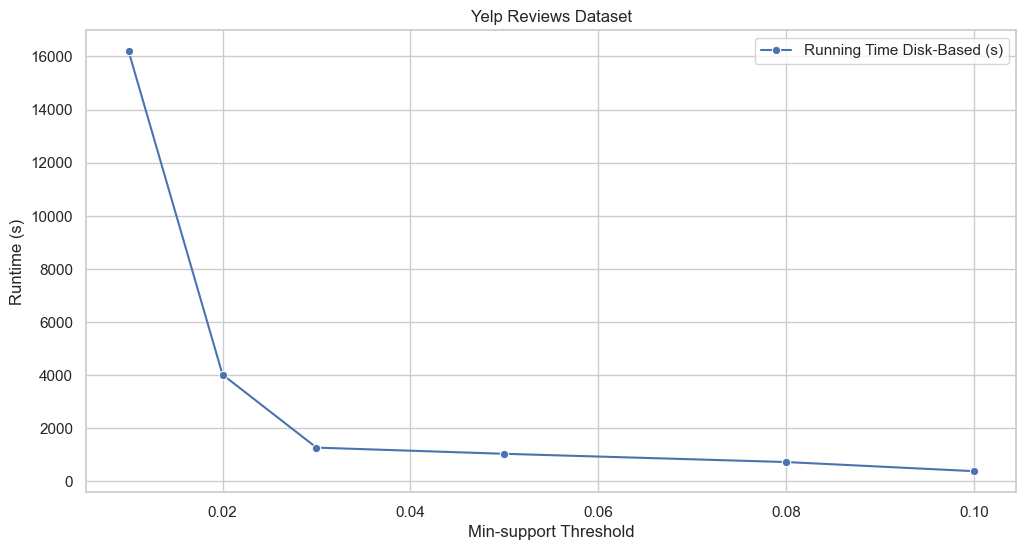

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_combined_runtimes(df, columns, title):
    
    plt.figure(figsize=(12, 6))
    df = df.sort_index(ascending=False)

    # Plotting each runtime column
    for column in columns:
        print(column)
        sns.lineplot(data=df, x=df.index, y=column, marker='o', label=column)

    # Adding titles and labels
    plt.title(title)
    plt.xlabel('Min-support Threshold')
    plt.ylabel('Runtime (s)')

    # Adding legend
    plt.legend()

    # Show the plot
    plt.show()
plot_combined_runtimes(yelp_df,['Running Time Disk-Based (s)'],'Yelp Reviews Dataset')

Running Time Disk-Based (s)
Running Time Candidate Generation (s)
Running Time FP-Growth


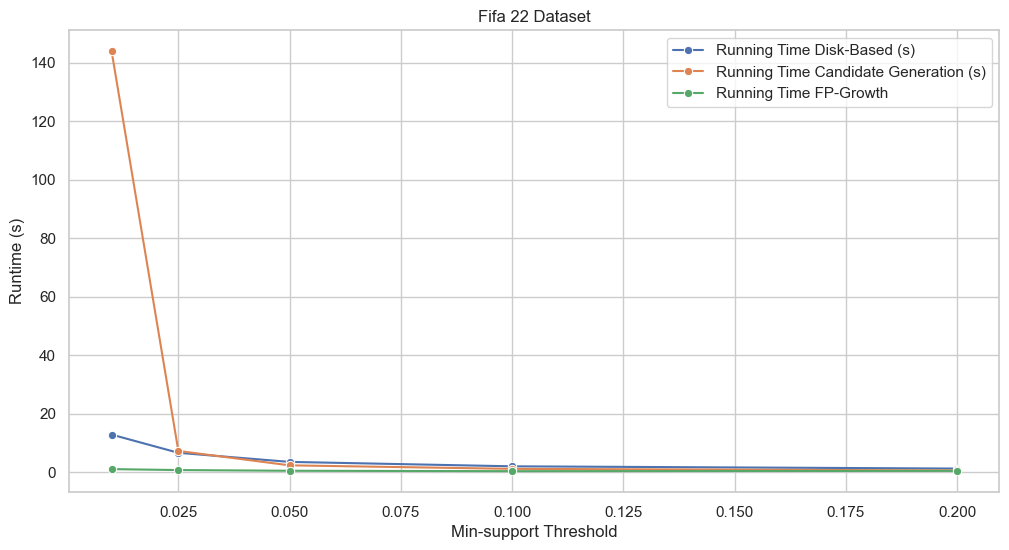

In [56]:
plot_combined_runtimes(fifa_df,['Running Time Disk-Based (s)','Running Time Candidate Generation (s)','Running Time FP-Growth'],'Fifa 22 Dataset')

In [48]:
fifa_df[fifa_df.columns]=fifa_df[fifa_df.columns]/60
fifa_df

,Running Time Disk-Based (s),Running Time Candidate Generation (s),Running Time FP-Growth
Min-support Threshold,,,
0.200,9.799383e-08,4.837963e-08,3.703704e-08
0.100,1.574074e-07,9.027778e-08,2.932099e-08
0.050,2.739198e-07,1.828704e-07,4.012346e-08
0.025,5.138889e-07,5.625000e-07,5.864198e-08
0.010,9.938272e-07,1.110648e-05,8.333333e-08


In [3]:
import ast
import pandas as pd
import numpy as np
transactions_fifa = pd.read_csv('processed_fifa.csv')['text']
freq_itemsets = pd.read_csv('itemsets_0.01_threshold.csv')['itemsets']
def get_binary_matrix(transactions, frequent_itemsets):
    matrix = np.ones((len(transactions), len(frequent_itemsets)))
    for i, transaction in enumerate(transactions):
        for j, itemset in enumerate(frequent_itemsets):
            for item in eval(itemset):
                if item not in ast.literal_eval(transaction): 
                    matrix[i][j] = 0
                    break
    return matrix

data = get_binary_matrix(transactions_fifa,freq_itemsets)
data

array([[1., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
df = pd.DataFrame(data,columns=freq_itemsets.tolist())
df

,frozenset({'player_tags_acrobat'}),frozenset({'player_traits_finesse shot'}),frozenset({'player_traits_long shot taker (ai)'}),frozenset({'player_traits_playmaker (ai)'}),frozenset({'player_traits_outside foot shot'}),frozenset({'player_traits_technical dribbler (ai)'}),frozenset({'passing_bucket_high'}),frozenset({'physic_bucket_medium'}),frozenset({'pace_bucket_high'}),frozenset({'mentality_bucket_high'}),...,"frozenset({'passing_bucket_medium', 'mentality_bucket_medium', 'pace_bucket_medium', 'physic_bucket_low', 'movement_bucket_high'})","frozenset({'passing_bucket_low', 'pace_bucket_low', 'mentality_bucket_low', 'movement_bucket_low', 'physic_bucket_medium'})","frozenset({'passing_bucket_low', 'pace_bucket_medium', 'mentality_bucket_low', 'physic_bucket_low', 'movement_bucket_medium'})","frozenset({'passing_bucket_low', 'mentality_bucket_medium', 'pace_bucket_medium', 'movement_bucket_medium', 'physic_bucket_low'})","frozenset({'passing_bucket_medium', 'mentality_bucket_medium', 'pace_bucket_low', 'movement_bucket_medium', 'physic_bucket_low'})","frozenset({'passing_bucket_low', 'mentality_bucket_low', 'pace_bucket_medium', 'movement_bucket_medium', 'physic_bucket_medium'})","frozenset({'passing_bucket_medium', 'pace_bucket_medium', 'mentality_bucket_low', 'physic_bucket_low', 'movement_bucket_medium'})","frozenset({'passing_bucket_low', 'mentality_bucket_low', 'pace_bucket_low', 'physic_bucket_low', 'movement_bucket_low'})","frozenset({'player_traits_speed dribbler (ai)', 'passing_bucket_medium', 'mentality_bucket_medium', 'pace_bucket_high', 'movement_bucket_high', 'physic_bucket_medium'})","frozenset({'player_traits_speed dribbler (ai)', 'passing_bucket_medium', 'mentality_bucket_medium', 'physic_bucket_low', 'movement_bucket_high', 'pace_bucket_high'})"
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
freq_df = pd.read_csv('itemsets_0.01_threshold.csv')

mapping = freq_df.set_index('itemsets')['support'].to_dict()

mapping = {eval(key): value for key, value in mapping.items()}

support_df = df.copy()
for col in support_df.columns:
    frozenset_col = eval(col)
    support_value = mapping.get(frozenset_col)
    if support_value is not None:
        support_df[col] = support_df[col].apply(lambda x: support_value if x == 1 else x)

support_df


,frozenset({'player_tags_acrobat'}),frozenset({'player_traits_finesse shot'}),frozenset({'player_traits_long shot taker (ai)'}),frozenset({'player_traits_playmaker (ai)'}),frozenset({'player_traits_outside foot shot'}),frozenset({'player_traits_technical dribbler (ai)'}),frozenset({'passing_bucket_high'}),frozenset({'physic_bucket_medium'}),frozenset({'pace_bucket_high'}),frozenset({'mentality_bucket_high'}),...,"frozenset({'passing_bucket_medium', 'mentality_bucket_medium', 'pace_bucket_medium', 'physic_bucket_low', 'movement_bucket_high'})","frozenset({'passing_bucket_low', 'pace_bucket_low', 'mentality_bucket_low', 'movement_bucket_low', 'physic_bucket_medium'})","frozenset({'passing_bucket_low', 'pace_bucket_medium', 'mentality_bucket_low', 'physic_bucket_low', 'movement_bucket_medium'})","frozenset({'passing_bucket_low', 'mentality_bucket_medium', 'pace_bucket_medium', 'movement_bucket_medium', 'physic_bucket_low'})","frozenset({'passing_bucket_medium', 'mentality_bucket_medium', 'pace_bucket_low', 'movement_bucket_medium', 'physic_bucket_low'})","frozenset({'passing_bucket_low', 'mentality_bucket_low', 'pace_bucket_medium', 'movement_bucket_medium', 'physic_bucket_medium'})","frozenset({'passing_bucket_medium', 'pace_bucket_medium', 'mentality_bucket_low', 'physic_bucket_low', 'movement_bucket_medium'})","frozenset({'passing_bucket_low', 'mentality_bucket_low', 'pace_bucket_low', 'physic_bucket_low', 'movement_bucket_low'})","frozenset({'player_traits_speed dribbler (ai)', 'passing_bucket_medium', 'mentality_bucket_medium', 'pace_bucket_high', 'movement_bucket_high', 'physic_bucket_medium'})","frozenset({'player_traits_speed dribbler (ai)', 'passing_bucket_medium', 'mentality_bucket_medium', 'physic_bucket_low', 'movement_bucket_high', 'pace_bucket_high'})"
0,0.018036,0.034305,0.079318,0.047872,0.032018,0.08805,0.213421,0.436249,0.194605,0.248558,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.000000,0.034305,0.000000,0.000000,0.032018,0.00000,0.213421,0.000000,0.194605,0.248558,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.018036,0.000000,0.079318,0.000000,0.032018,0.00000,0.213421,0.000000,0.194605,0.248558,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.018036,0.000000,0.000000,0.047872,0.032018,0.08805,0.213421,0.436249,0.194605,0.248558,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.000000,0.000000,0.079318,0.047872,0.032018,0.00000,0.213421,0.000000,0.000000,0.248558,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
19235,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
19236,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.011071,0.0,0.0
19237,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.032174,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [6]:
fifa = pd.read_csv('players_22.csv')[['wage_eur','short_name']]
df['wage']=fifa['wage_eur']
df.head(5)
df['wage_class'] = pd.qcut(df['wage'].fillna(0), [0, 0.25, 0.75, 1.0], labels=[1, 2, 3])

/var/folders/p0/5x4yyb8n6gd8wg8x61z121b40000gp/T/ipykernel_23764/3024290246.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  fifa = pd.read_csv('players_22.csv')[['wage_eur','short_name']]


In [7]:
fifa = pd.read_csv('players_22.csv')[['wage_eur','short_name']]
support_df['wage']=fifa['wage_eur']
support_df['wage_class'] = pd.qcut(support_df['wage'].fillna(0), [0, 0.25, 0.75, 1.0], labels=[1, 2, 3])

/var/folders/p0/5x4yyb8n6gd8wg8x61z121b40000gp/T/ipykernel_23764/3488918574.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  fifa = pd.read_csv('players_22.csv')[['wage_eur','short_name']]
/var/folders/p0/5x4yyb8n6gd8wg8x61z121b40000gp/T/ipykernel_23764/3488918574.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  support_df['wage']=fifa['wage_eur']
/var/folders/p0/5x4yyb8n6gd8wg8x61z121b40000gp/T/ipykernel_23764/3488918574.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame

In [253]:
support_df

,frozenset({'player_tags_acrobat'}),frozenset({'player_traits_finesse shot'}),frozenset({'player_traits_long shot taker (ai)'}),frozenset({'player_traits_playmaker (ai)'}),frozenset({'player_traits_outside foot shot'}),frozenset({'player_traits_technical dribbler (ai)'}),frozenset({'passing_bucket_high'}),frozenset({'physic_bucket_medium'}),frozenset({'pace_bucket_high'}),frozenset({'mentality_bucket_high'}),...,"frozenset({'passing_bucket_low', 'mentality_bucket_medium', 'pace_bucket_medium', 'movement_bucket_medium', 'physic_bucket_low'})","frozenset({'passing_bucket_medium', 'mentality_bucket_medium', 'pace_bucket_low', 'movement_bucket_medium', 'physic_bucket_low'})","frozenset({'passing_bucket_low', 'mentality_bucket_low', 'pace_bucket_medium', 'movement_bucket_medium', 'physic_bucket_medium'})","frozenset({'passing_bucket_medium', 'pace_bucket_medium', 'mentality_bucket_low', 'physic_bucket_low', 'movement_bucket_medium'})","frozenset({'passing_bucket_low', 'mentality_bucket_low', 'pace_bucket_low', 'physic_bucket_low', 'movement_bucket_low'})","frozenset({'player_traits_speed dribbler (ai)', 'passing_bucket_medium', 'mentality_bucket_medium', 'pace_bucket_high', 'movement_bucket_high', 'physic_bucket_medium'})","frozenset({'player_traits_speed dribbler (ai)', 'passing_bucket_medium', 'mentality_bucket_medium', 'physic_bucket_low', 'movement_bucket_high', 'pace_bucket_high'})",wage,wage_class,sum
0,0.018036,0.034305,0.079318,0.047872,0.032018,0.08805,0.213421,0.436249,0.194605,0.248558,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,320000.0,3,6.064089
1,0.000000,0.034305,0.000000,0.000000,0.032018,0.00000,0.213421,0.000000,0.194605,0.248558,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,270000.0,3,3.099485
2,0.018036,0.000000,0.079318,0.000000,0.032018,0.00000,0.213421,0.000000,0.194605,0.248558,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,270000.0,3,4.654608
3,0.018036,0.000000,0.000000,0.047872,0.032018,0.08805,0.213421,0.436249,0.194605,0.248558,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,270000.0,3,7.272363
4,0.000000,0.000000,0.079318,0.047872,0.032018,0.00000,0.213421,0.000000,0.000000,0.248558,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,350000.0,3,5.015749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1000.0,1,2.846406
19235,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,500.0,1,2.846406
19236,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.011071,0.0,0.0,500.0,1,2.556734
19237,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,500.0,1,3.969021


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

X = df.drop(['wage','wage_class'], axis=1)

y = df['wage_class']              

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=100)


knn.fit(X_train.fillna(0).values, y_train.values)
y_pred = knn.predict(X_test.fillna(0).values)
y_pred_train = knn.predict(X_train.fillna(0).values)

print(classification_report(y_train, y_pred_train))
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print(classification_report(y_test, y_pred))
print("Test Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.60      0.51      0.55      4826
           2       0.56      0.68      0.62      6785
           3       0.68      0.56      0.61      3780

    accuracy                           0.60     15391
   macro avg       0.61      0.58      0.59     15391
weighted avg       0.60      0.60      0.59     15391

Train Accuracy: 0.5961925800792671
              precision    recall  f1-score   support

           1       0.62      0.56      0.59      1259
           2       0.57      0.67      0.61      1678
           3       0.68      0.53      0.60       911

    accuracy                           0.60      3848
   macro avg       0.62      0.59      0.60      3848
weighted avg       0.61      0.60      0.60      3848

Test Accuracy: 0.6023908523908524


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

X = support_df.drop(['wage','wage_class'], axis=1)

y = support_df['wage_class']              

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

knn = KNeighborsClassifier(n_neighbors=100)


knn.fit(X_train.fillna(0).values, y_train.values)
y_pred = knn.predict(X_test.fillna(0).values)
y_pred_train = knn.predict(X_train.fillna(0).values)

print(classification_report(y_train, y_pred_train))
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print(classification_report(y_test, y_pred))
print("Test Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.60      0.48      0.54      4826
           2       0.56      0.69      0.62      6785
           3       0.67      0.56      0.61      3780

    accuracy                           0.59     15391
   macro avg       0.61      0.58      0.59     15391
weighted avg       0.60      0.59      0.59     15391

Train Accuracy: 0.5928139821973881
              precision    recall  f1-score   support

           1       0.63      0.54      0.58      1259
           2       0.56      0.68      0.61      1678
           3       0.67      0.54      0.60       911

    accuracy                           0.60      3848
   macro avg       0.62      0.59      0.60      3848
weighted avg       0.61      0.60      0.60      3848

Test Accuracy: 0.6005717255717256


In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


X = support_df.drop(['wage','wage_class'], axis=1)

y = support_df['wage_class']              

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=100)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.fillna(0))
X_test_scaled = scaler.transform(X_test.fillna(0))

pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

knn.fit(X_train_pca, y_train)
y_pred = knn.predict(X_test_pca)
y_pred_train = knn.predict(X_train_pca)

print(classification_report(y_train, y_pred_train))
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print(classification_report(y_test, y_pred))
print("Test Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.59      0.51      0.55      4826
           2       0.56      0.68      0.62      6785
           3       0.69      0.55      0.61      3780

    accuracy                           0.60     15391
   macro avg       0.61      0.58      0.59     15391
weighted avg       0.60      0.60      0.59     15391

Train Accuracy: 0.5957377688259372
              precision    recall  f1-score   support

           1       0.62      0.56      0.59      1259
           2       0.57      0.66      0.61      1678
           3       0.66      0.54      0.60       911

    accuracy                           0.60      3848
   macro avg       0.61      0.59      0.60      3848
weighted avg       0.61      0.60      0.60      3848

Test Accuracy: 0.5997920997920998


In [258]:
import umap

# Initialize UMAP
reducer = umap.UMAP(n_components=100)

X_train_umap = reducer.fit_transform(X_train_scaled)
X_test_umap = reducer.transform(X_test_scaled)

knn.fit(X_train_umap, y_train)
y_pred = knn.predict(X_test_umap)
y_pred_train = knn.predict(X_train_umap)

print(classification_report(y_train, y_pred_train))
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print(classification_report(y_test, y_pred))
print("Test Accuracy:", accuracy_score(y_test, y_pred))

/Users/caleb/Desktop/anaconda3/lib/python3.11/site-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


              precision    recall  f1-score   support

           1       0.60      0.49      0.54      4826
           2       0.56      0.52      0.54      6785
           3       0.49      0.67      0.56      3780

    accuracy                           0.55     15391
   macro avg       0.55      0.56      0.55     15391
weighted avg       0.56      0.55      0.55     15391

Train Accuracy: 0.5469430186472614
              precision    recall  f1-score   support

           1       0.56      0.50      0.53      1259
           2       0.55      0.52      0.53      1678
           3       0.47      0.59      0.52       911

    accuracy                           0.53      3848
   macro avg       0.53      0.54      0.53      3848
weighted avg       0.53      0.53      0.53      3848

Test Accuracy: 0.5288461538461539


In [11]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=100)
X_train_svd = svd.fit_transform(X_train.fillna(0))
X_test_svd = svd.transform(X_test.fillna(0))

knn.fit(X_train_svd, y_train)
y_pred = knn.predict(X_test_svd)
y_pred_train = knn.predict(X_train_svd)

print(classification_report(y_train, y_pred_train))
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print(classification_report(y_test, y_pred))
print("Test Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.61      0.49      0.54      4826
           2       0.56      0.69      0.62      6785
           3       0.67      0.57      0.62      3780

    accuracy                           0.60     15391
   macro avg       0.61      0.58      0.59     15391
weighted avg       0.60      0.60      0.59     15391

Train Accuracy: 0.5954129036449873
              precision    recall  f1-score   support

           1       0.63      0.54      0.58      1259
           2       0.56      0.68      0.62      1678
           3       0.67      0.56      0.61       911

    accuracy                           0.60      3848
   macro avg       0.62      0.59      0.60      3848
weighted avg       0.61      0.60      0.60      3848

Test Accuracy: 0.604989604989605


In [19]:
import shap

background = shap.sample(X_train, 100)
test = shap.sample(X_test, 50)

explainer = shap.KernelExplainer(model=knn.predict, data=background, link="identity")
shap_values = explainer.shap_values(test)

  0%|          | 0/50 [00:00<?, ?it/s]

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


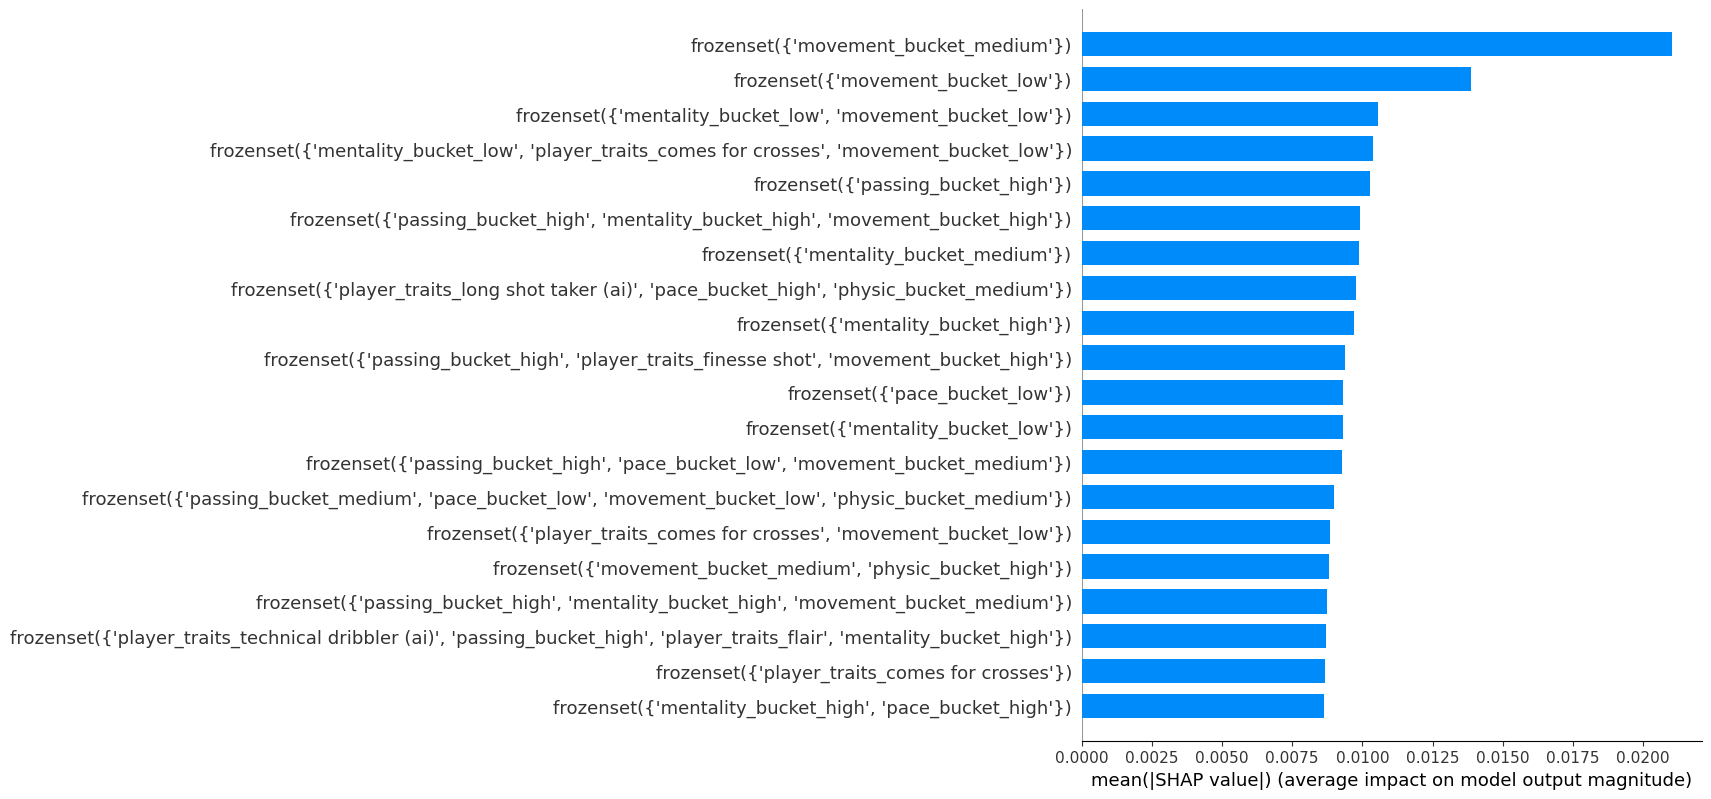

In [23]:
import shap

shap.summary_plot(shap_values, test,plot_type='bar',class_names = ["1","2","3"])


In [221]:
pd.DataFrame(X_train_svd)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.389844,-0.173057,0.373029,0.214840,0.007983,0.312356,-0.030927,-0.320104,0.022632,0.088035,...,0.011113,-0.003320,0.002902,0.008317,0.020690,0.037125,-0.011670,0.026568,0.003542,0.011023
1,1.182222,-0.058727,-0.559621,-0.030023,0.123782,-0.072276,0.030771,-0.029378,-0.228128,-0.064244,...,-0.000364,0.008009,0.006899,0.005630,0.006802,-0.003851,-0.004033,-0.004040,0.022379,-0.016941
2,0.740593,-0.407231,-0.284649,-0.180044,0.272324,0.207060,0.258061,-0.226584,0.030209,-0.085661,...,-0.025820,-0.008800,-0.011699,0.009626,-0.026810,-0.013946,0.002761,-0.003597,0.009106,0.014291
3,0.012898,0.000455,0.045554,0.107458,0.090748,0.088568,0.248824,0.020676,-0.076954,0.173117,...,0.001312,0.000141,0.000855,0.001277,0.000101,0.000633,-0.001218,0.000306,0.000280,0.001048
4,1.064715,-0.250511,0.303696,0.404214,-0.233761,-0.259422,-0.103813,-0.035700,0.130089,0.026991,...,0.013069,-0.002568,0.002040,0.012758,-0.012511,-0.012405,0.000906,-0.013781,-0.005866,-0.008620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15386,0.612210,0.646295,0.233139,0.082812,0.019374,0.183564,0.175079,0.143886,0.040391,-0.194260,...,0.010500,0.005695,0.017166,0.021025,-0.010311,-0.021836,-0.005804,-0.003744,0.000626,0.005519
15387,1.416512,0.049783,0.011726,-0.149996,-0.386004,-0.019109,0.094715,0.024367,-0.040930,0.083583,...,-0.000225,0.002728,0.001922,-0.001259,0.001981,-0.003665,-0.005186,-0.000319,0.001359,0.002591
15388,0.624379,0.718923,0.262346,-0.139631,0.121431,-0.045728,-0.033411,-0.217643,0.186190,0.050201,...,-0.008795,0.009088,0.007714,0.001755,-0.002896,0.006889,-0.002371,-0.001312,0.003150,0.000321
15389,0.727913,-0.415307,-0.175885,-0.343438,0.242472,0.252381,0.037372,0.174647,0.280211,0.009020,...,0.013720,-0.003088,0.011710,0.028815,0.006067,-0.000078,-0.007676,-0.006316,-0.001839,0.004786


In [180]:
freq_itemsets = pd.read_csv('itemsets_0.01_threshold.csv')['support']
freq_itemsets

0       0.018036
1       0.034305
2       0.079318
3       0.047872
4       0.032018
          ...   
1132    0.015437
1133    0.011955
1134    0.011071
1135    0.013046
1136    0.010655
Name: support, Length: 1137, dtype: float64

In [225]:
freq_itemsets = pd.read_csv('itemsets_0.01_threshold.csv')['support']
X = df.drop(['wage','wage_class'], axis=1)

single = pd.DataFrame(np.dot(X,np.array(freq_itemsets).T))

X = single

y = df['wage_class']              

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=10)


knn.fit(X_train.fillna(0).values, y_train.values)
y_pred = knn.predict(X_test.fillna(0).values)


print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.52      0.45      0.48      1259
           2       0.49      0.60      0.54      1678
           3       0.47      0.37      0.41       911

    accuracy                           0.50      3848
   macro avg       0.49      0.47      0.48      3848
weighted avg       0.50      0.50      0.49      3848

Accuracy: 0.4966216216216216


In [243]:
single

,0
0,6.064089
1,3.099485
2,4.654608
3,7.272363
4,5.015749
...,...
19234,2.846406
19235,2.846406
19236,2.556734
19237,3.969021


In [ ]:
freq_itemsets = pd.read_csv('itemsets_0.01_threshold.csv')['support']


In [158]:
y_test

12650    2
17324    1
18776    1
12807    1
12658    1
        ..
9924     2
176      3
14677    2
8396     2
8546     2
Name: wage_class, Length: 3848, dtype: category
Categories (3, int64): [1 < 2 < 3]

In [155]:
y_pred

array([2, 1, 1, ..., 2, 2, 2])